# Clustering Analysis

In this example, we'll start to examine *unsupervised* learning techniques designed to uncover patterns in data when specific labels have not yet been provided for target features.

**Learning Objectives**

1. Differentiate between supervised and unsupervised learning
2. Outline the steps for classification using the $k$-means clustering algorithm 
3. Apply $k$-means clustering using the `scikit-learn` toolkit

**Import modules**

Begin by importing the modules to be used in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cs171lecture121 as cs

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# get a color list for plotting
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Unsupervised Learning
Up until now we've been working with labele data - that is, datasets where we know what our target features should look like. Take, for example, the following data we've seen so far:

| Data Set | Feature(s) | Label | Notebook |
|----------|-------|----------|----------|
| Mauna Loa Carbon Dioxide Measurements | Time | CO$_2$ Concentration | Multiple Linear Regression |
| Sea Lion Morphometric Data | Sea Lion Skull Size and Body Length | Sea Lion Sex | Logistic Regression |
| Sea Creature Images | Image Pixels | Sea Creature Classification | Convolutional Neural Networks |

In each of these cases, we've built a model to predict the labels of unseen data given some features - and in each case, we've had a data set where the labels of our features are already provided. This type of machine learning is termed "supervised" since we are providing instructions to our algorithms to determine the model targets.

In this notebook and the few that follow, we're going to explore patterns in our data that provide clues into how our data could be labeled. Since we don't have any labels on our data *a priori*, we call this approach "unsupervised learning".

## Sea Lions Revisited
As a first example of unsupervised learning, let's take a look at the sea lion data we encountered in our classification notebooks. Let's read in that data here:

In [4]:
# read in the two data frames
df_male = pd.read_csv('male_sea_lion_measurements.csv')
df_female = pd.read_csv('female_sea_lion_measurements.csv')

# concatenate the dataframes
df = pd.concat([df_male, df_female])

# drop nans
df = df.dropna()

In this example, we know which sea lions are male and female - but suppose we didn't know that. We could procede by plotting this data to see what it looks like:

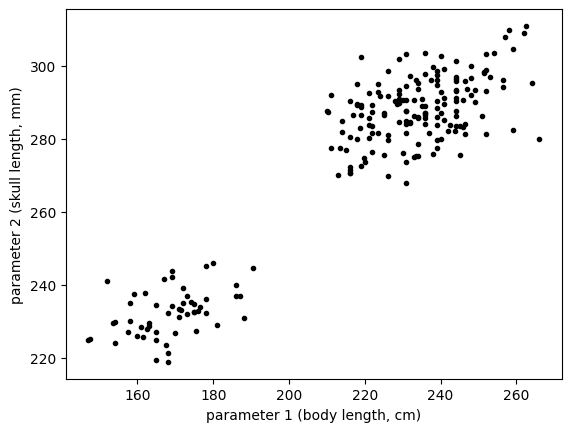

In [5]:
plt.plot(df['SL'], df['CBL'],'k.')
plt.xlabel('parameter 1 (body length, cm)')
plt.ylabel('parameter 2 (skull length, mm)')
plt.show()

In this plot, we can see visually that there are two natural groups in our data. Let's see how we can build an algorithm to assign a grouping to the unlabeled data as shown above.

## $k$-Means Clusting

$k$-means clustering is a simple and popular clustering algorithm in which we assign categories based on an object's distance to centroid points. It is similar in flavor to the $k$-Nearest Neighbor classification algorithm we saw in our earlier lesson - however, in $k$-means clustering, we don't know the classification of any point or where the centroids are located - both of these are determined in the clustering process.

### The $k$-Means Clustering Algorithm

The $k$-means clustering algorithm starts by choosing $k$ centroid points for comparison. These could be chosen at random or possibly in some other strategy. In this process, the hyper-parameter $k$ is chosen by the user.

Subsequently, there is an iterative process to improve the clustering in the following steps:
1. Assign each point to the nearest centroid (similar to KNN)
2. Update the centroid points to the center of its assigned values

These two steps are then repeated until the algorithm converges within some tolerance, or until a maximum number of iterations is reached.

In this approach, the assignment of points to the nearest cluster requires a distance metric. Typically, the (square of the) Euclidean distance is used:

$$
d(x,y) = \sum_{i=1}^N (x_i - y_i)^2
$$

where $N$ is the number of elements in the feature array (e.g. 2 for the sea lion example - body length and skull length).

Since this is an iterative algorithm, the optimization can be thought of as gradient descent, just like almost every other algorithm we've encountered. Just as for any gradient descent algorithm, we need to have some metric for computing the loss. Here, we will use the sum or square errors:

$$
L = \sum_{p=1}^P \sum_{k=1}^K w^{(p,k)} d(x^{(p)}, \mu^{(k)})
$$

Here, $\mu^{(k)}$ represents the $k$th centroid and the weight $w^{(p,k)}$ indicates whether the $p$th point belongs to class $k$ i.e.

$$
w = \begin{cases} 
      1 & x^{(p)} \text{ in class }k \\
      0 & \text{ otherwise}
   \end{cases}
$$

Effectively, we are just summing up all of the Euclidean distances for each point relative to their assigned centroid. When this loss is minimized, all points will have been assigned their most suitable centroid i.e. each point will be classified with their most similar collection of points.

Let's see how this works in `scikit-learn`. First, let's prepare a design matrix:

In [6]:
# prep a design matrix with just the desired data
X_sealion = np.column_stack([df['SL'], df['CBL']])

Then, we'll use the `KMeans` class to generate a model object and fit it to the data. Since we can see from the plot that there are two clear clusters, let's set $k=2$ for this first example:

In [8]:
# define a function to compute classifications with 
# KMeans given the parameter K and the design matrix X
# this will be used several times below
def compute_KMeans(K, X):
    km = KMeans(n_clusters=K, init='random', max_iter=300, random_state=0)
    classification = km.fit_predict(X)
    return km, classification

In [9]:
# run the classification function on the sea lion data
K = 2
km, classification = compute_KMeans(K, X_sealion)

In [10]:
classification

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's check out the results:

In [13]:
# make a function to plot the classification results
# this function will also be used several times below
def plot_kMeans(km, classification, K, X):
    
    for k in range(K):
        plt.plot(X[classification==k, 0], 
                 X[classification==k, 1], 
                 '.', color=colors[k])
        
        plt.scatter(km.cluster_centers_[k][0], 
                    km.cluster_centers_[k][1], 
                    marker='*', s=500, facecolors=colors[k], edgecolors='k', linewidth=1, zorder=99)

    plt.show()

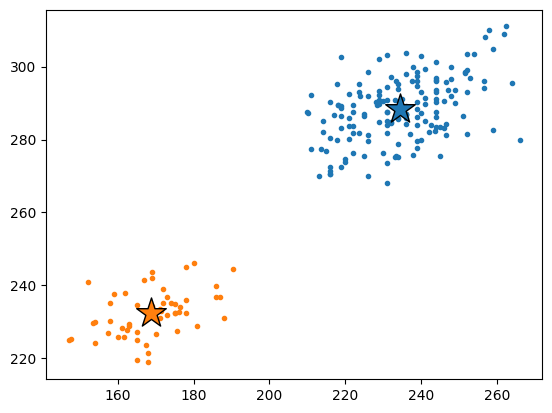

In [14]:
# plot the sea lion classification data
plot_kMeans(km, classification, K, X_sealion)

As we can see the centroid points, indicated by the stars, are design to fit directly in the middle of each cluster. Then, each set of points is assigned to be the classification of the centroid. It turns out that this clustering algorithm was able to delineate the male and female groups in our data even though we didn't tell the model which point belonged to which classification.

### Choosing the right amount of clusters

In the above example, it was clear that we should have two clusters by visual inspection of the plot. However, it's not always clear how many there should be - and this is especially true when working with data that has more than two dimensions. For example, consider the following cluster of points:

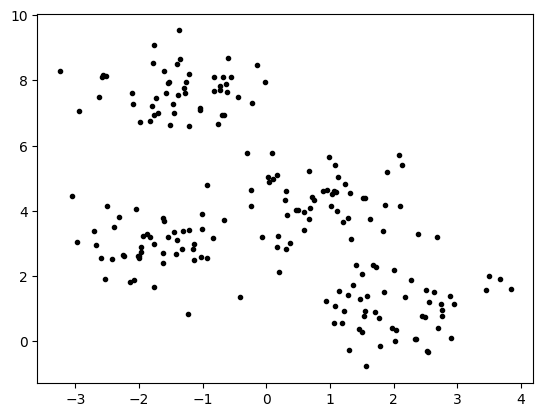

In [15]:
# make some random blobs of points and plot them
X_blob, y_blob = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.75, shuffle=True, random_state=0)
plt.plot(X_blob[:,0], X_blob[:,1],'k.')
plt.show()

In this case, we've created a dataset with four blobs and our algorithm should be able to pick those out. Let's see how the algorithm does on this data:

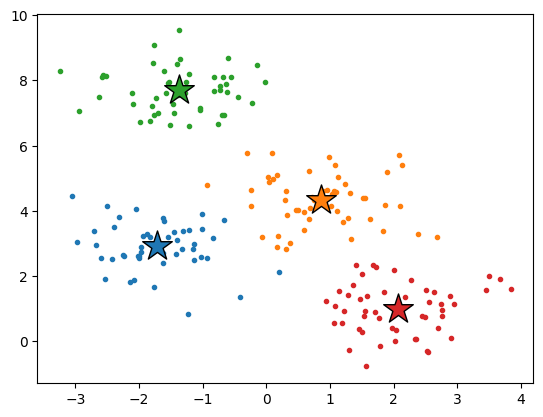

In [18]:
K = 4
km, classification = compute_KMeans(K, X_blob)
plot_kMeans(km, classification, K, X_blob)

This looks pretty good. However, what if we didn't know how this should look and we assumed there should be 2 classifications?

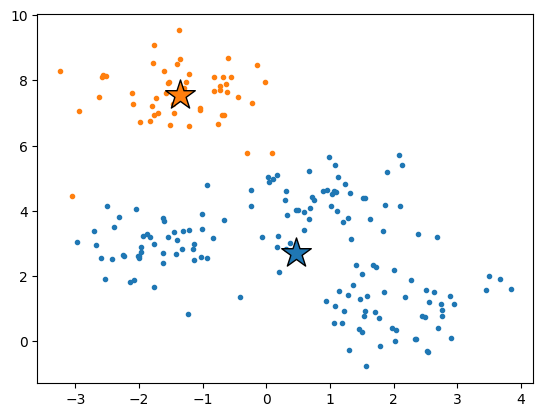

In [20]:
K = 2
km, classification = compute_KMeans(K, X_blob)
plot_kMeans(km, classification, K, X_blob)

This could be an equally valid classification... right? Clearly, we need some more objective way to determine how many classifications are right for our data.

### The "Elbow" Method
To determine the "right" amount of clusters for our data, we can examine our metric for losses - the sum of square errors define above - over different values for $k$. The sum of square errors is also known as the "inertia" of the clusters and this parameter is directly available from the `KMeans` object. Let's define that here:

In [22]:
# make a function to plot the SSEs over a given k range
def plot_sses(X, k_max=10):
    sses = []
    for k in range(1, k_max+1):
        km = KMeans(n_clusters=k, init='random', random_state=0)
        km.fit(X)
        sses.append(km.inertia_)
    
    fig = plt.figure(figsize=(8,4))
    plt.plot(range(1,k_max+1), sses, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Square Errors')
    plt.tight_layout()
    plt.show()

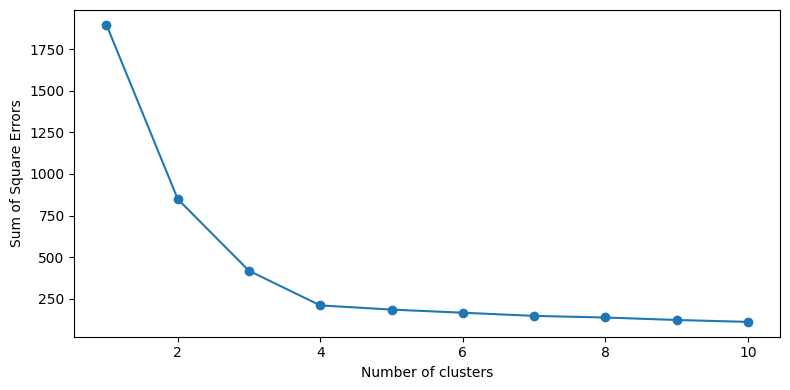

In [23]:
# plot the SSE curve for the blob data
plot_sses(X_blob, k_max=10)

As we can see in the plot above, the sum of square errors drops rapidly up until there are 4 clusters and then there are diminishing returns thereafter. This is the "elbow" of the plot and it gives us an objective metric to determine how many clusters there should be. Clearly, we could have as many clusters as there are points and have zero loss - but that doesn't really tell us what we want. Here, we want to balance the information gained by grouping our points into the number of clusters with the decrease in the loss function.

We can examine this for our sea lion example above to compare results:

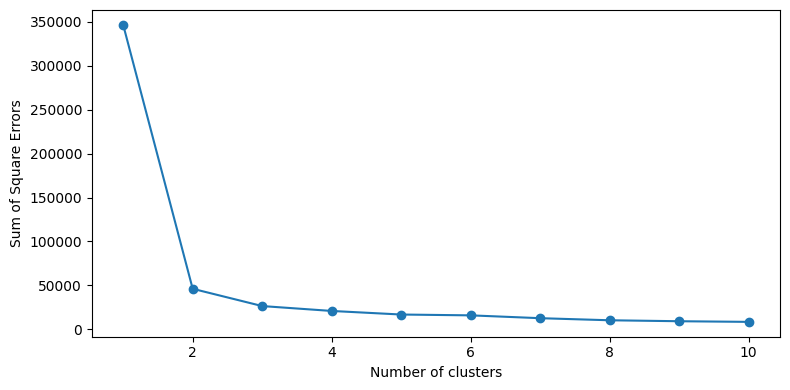

In [24]:
# plot the SSE curve for the sea lion data
plot_sses(X_sealion, k_max=10)

In this case, we see that there is an elbow at $k=2$ rather than $k=4$, aligning with our visual inspection of the plot.

## Exploring Ocean Biomes

In the previous examples, we investigated datasets with only two features. However, clustering can be used for data sets with more features. Sunch a data set would be impossible to visualize on a single 2-dimensional plot. 

To illustrate this type of example, here we will examine an approach to define ocean biomes - large geographic areas defined by specific physical and ecologically-important ocean properties. These properties dictate which plants and animals can thrive in a given environment. In this example, we will use eight global properties to define these biomes. 

Let's read in this data here using a pre-defined helper script for this notebook:

In [25]:
lon, lat, temp, salt, o2, no3, po4, fe, PP, sunlight =\
    cs.read_ocean_properties_dataset()

Similarly, let's visualize this data here:

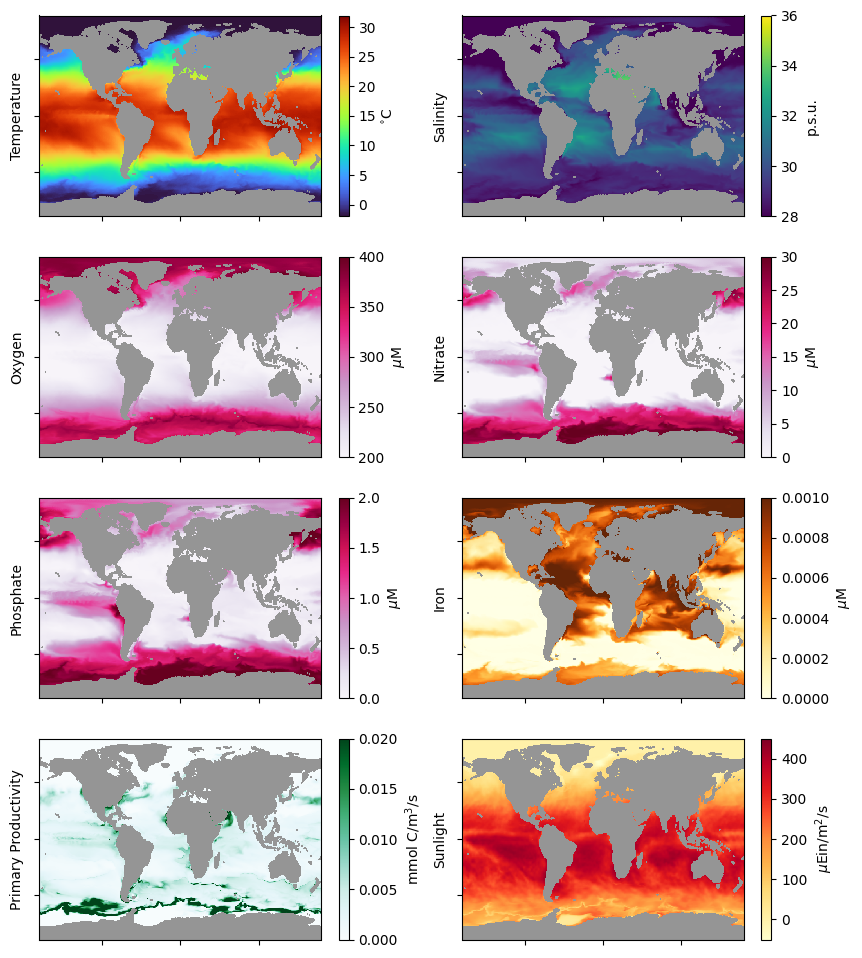

In [26]:
cs.plot_ocean_properties_dataset(lon, lat, temp, salt, o2, no3, po4, fe, PP, sunlight)

### Classifying Biomes with $k$-Means Clustering
Using the data provided above, let's define some of the ocean biomes. We'll begin by making a design matrix with all of our data, one per column:

In [27]:
X_ocean = np.column_stack([temp.ravel(), salt.ravel(), o2.ravel(), no3.ravel(), po4.ravel(), fe.ravel(), PP.ravel(), sunlight.ravel()])

Next, we'll remove all of the 0 data from our data set (so we ignore data is on land):

In [28]:
X_ocean = X_ocean[temp.ravel() != 0, :]

Finally, let's standardize our data so that all variable contribute equally to the distance metric:

In [29]:
for col in range(np.shape(X_ocean)[1]):
    X_ocean[col, :] = (X_ocean[col, :] - np.mean(X_ocean[col, :])) / np.std(X_ocean[col, :])

Ok, with our data ready, let's use the elbow method to determine the proper amount of clusters for the biomes:

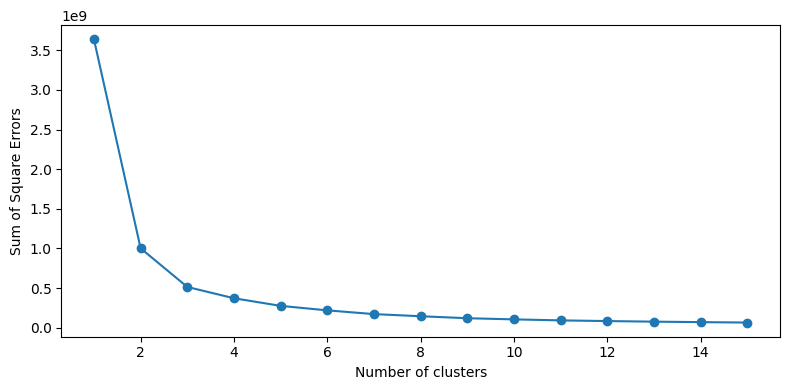

In [31]:
# plot the SSE curve for the ocean data
plot_sses(X_ocean, k_max=15)

Above, the "elbow" of the plot is not as clear as before - that is, there is a consistent diminishing of the SSEs. From the graph it appears the elbow happens around $k=5$ but perhaps there could be as many as 10 clusters.

Here, we'll need to use a little human intuition and domain knowledge to determine an ideal number of clusters. Let's start with 5 and see how our results look: 

In [32]:
K = 5
km, classification = compute_KMeans(K, X_ocean)

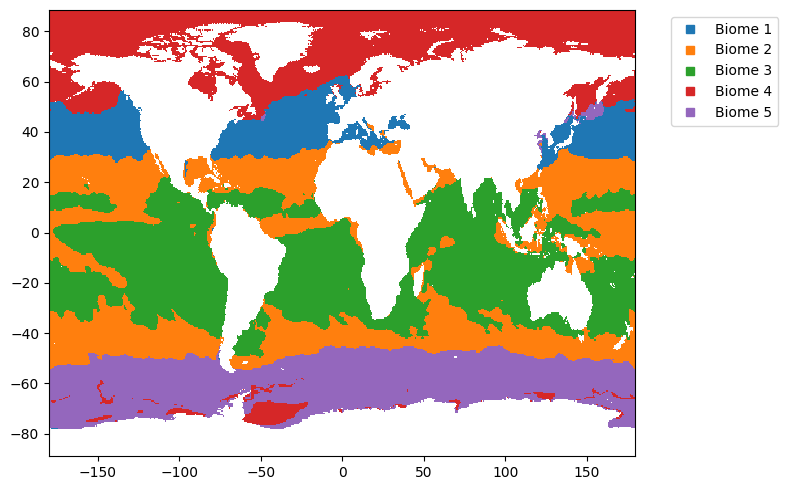

In [33]:
cs.plot_biome_classification(lon, lat, classification, temp)

With $k=5$ clusters, we see that the clustering is picking some broad trends in the ocean - namely the different water masses for the Pacific, Atlantic, Arctic, and Southern Oceans. There is one outlier section on the edge of the sea ice - a unique feature in this dataset.

We can also example what happens when we try more classifications. Let's take a look at that here:

In [34]:
K = 10
km, classification = compute_KMeans(K, X_ocean)

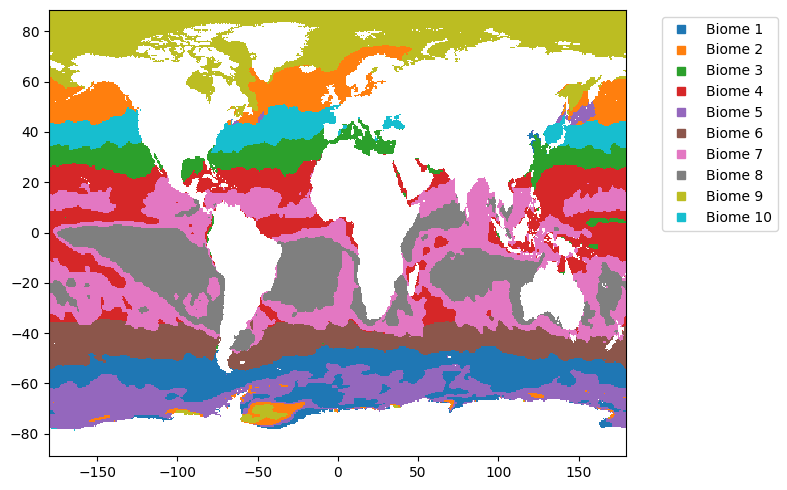

In [35]:
cs.plot_biome_classification(lon,lat,classification, temp)

With more clusters, we start to see more biomes emerge. For example, the Indian Ocean now largely receives a unique classification whiel the Arctic Ocean now has two unique regions. This type of clustering analysis is a starting point for starting to examine individual ecological regions in more detail.

In the next notebook, we'll checkout more sophisticated clustering algorithms and we'll see how it impacts our results!

**Key Takeaways**

1. Unsupervised learning algorithms are used to find patterns in data without target labels
2. The $k$-means clustering algorithm is a simple approach for classifying unlabeled data. 
3. The "elbow" in the loss curve can be used to determine an appropriate number of clusters to use in the $k$-means algorithm.